In [1]:
print("asdf"[-2])

d


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


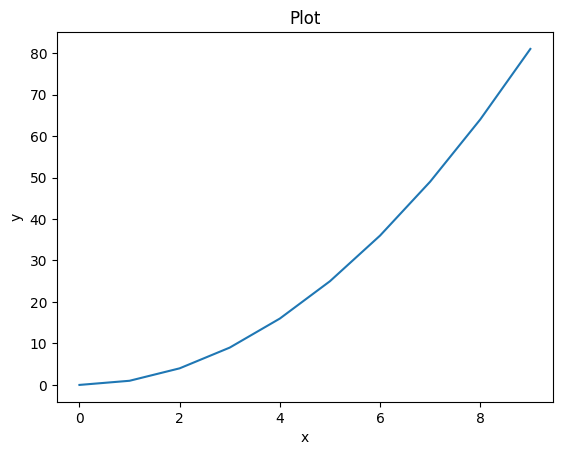

In [15]:
import matplotlib.pyplot as plt

x = list(range(10))
y = [i**2 for i in x]
fig, ax = plt.figure(), plt.axes()
ax.plot(x, y)
ax.set(title="Plot", xlabel="x", ylabel="y")
print(x)
print(type(fig))
print(type(ax))

# svar: skriver alla kvadrater på  tal mellan 0 till 9.

Simulera 1000000 tärningskast och beräkna antalet ettor, tvåor, treor, fyror, femmor och sexor. Spara
resultatet i en lämplig datastruktur.


In [21]:
%%timeit

import random

rolls = [random.randint(1, 6) for i in range(1000000)]
sorted_rolls = {
    "ones": rolls.count(1),
    "twos": rolls.count(2),
    "threes": rolls.count(3),
    "fours": rolls.count(4),
    "fives": rolls.count(5),
    "sixes": rolls.count(6),
}



616 ms ± 8.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%%timeit

import random as rnd

rolls = [rnd.randint(1, 6) for i in range(1000000)]
sorted_rolls = dict(
    ones = rolls.count(1),
    twos = rolls.count(2),
    threes = rolls.count(3),
    fours = rolls.count(4),
    fives = rolls.count(5),
    sixes = rolls.count(6),
)

616 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
import random as rnd

dice_list = {}

for i, number in enumerate("123456"):
    dices = [rnd.randint(1,6) for i in range(1000000)]
    dice_list[number]= dices.count(i+1)
print(dice_list)

{'1': 166321, '2': 166354, '3': 166133, '4': 166742, '5': 166638, '6': 166901}


Skriv en funktion som tar in en radie som inparameter och som returnerar volymen av en sfär. Volymen för en
sfär är: V = (4*pi*r^3)/3
Låt användaren mata in ett tal och kör funktionen. Tänk på att ta med lämplig felhantering.


In [ ]:
from __future__ import annotations
from math import pi

def sphere_volume(radius: (int | float)) -> float:
    """Calculates volue of a sphere of a given radius"""
    if not isinstance(radius, (int, float)):
        raise TypeError(f"Radius must be int or float, not {type(radius).__name__}")
    if radius <= 0:
        raise ValueError(f"Radius must be positive")



In [27]:
import math
import doctest
def sphere_vol(r):
    """
    >>> sphere_vol(1) = 5.1887902047863905
    """
    #  r = input("enter radius")
    if not isinstance(r, (float, int)):
        raise TypeError(f"radius must be int or float, not {type(r)}")
    return (4*math.pi*r**3)/3
sphere_vol(1)
doctest.testmod()

AttributeError: partially initialized module 'doctest' has no attribute 'testmod' (most likely due to a circular import)

Läs in en textfil som heter bamba.txt och innehåller:
v42
Chili sin carne
Pannkakor
Ärtsoppa
Kebab
Vegetarisk lasagne
Läs in texterna och skriv ut dem i terminalen.

In [37]:
with open("bamba.txt", "r") as f:
    a = f.read()
print(f)
print(a)

<_io.TextIOWrapper name='bamba.txt' mode='r' encoding='cp1252'>
v42
Chili sin carne
Pannkakor
Ã„rtsoppa
Kebab
Vegetarisk lasagne



Uppgift 5 (3p)
Skapa en funktion som tar in två punkter i 2D , och som returnerar tillbaka avståndet mellan
dessa. Anropa därefter denna funktion för test
Det finns en textfil som heter testpunkter.txt som ligger i undermappen testpoints och innehåller:
Punkt 1, punkt 2
(1,2), (0,0)
(2,0), (3,5)
...
(-2,-2), (9,2)


In [55]:
import math

def dist(p1: tuple, p2: tuple) -> float:
    if not isinstance(p1, tuple) or not isinstance(p2, tuple):
        raise TypeError("p1 and p2 must be tuple")
    if len(p1) != 2 or len(p2) != 2:
        raise ValueError("tuple must be length two")
    x1, x2 = p1
    y1, y2 = p2
    return math.sqrt((x2-x1)**2+(y2-y1)**2)

with open("testpoints/testpunkter.txt") as f:
    lines = f.readlines()
    lines.pop(0)

    lines_clean = []
    for line in lines:
        line = line.replace("(", "")
        line = line.replace(")", "")
        line = line.replace(" ", "")
        line = line.replace("\n", "")
        lines_clean.append(line)

    lines_split = []
    for line in lines_clean:
        lines_split.append(line.split(","))

    lines_floated = []
    for line in lines_split:
        for index in line:
            lines_floated.append(float(index))
print(lines_floated)






[1.0, 2.0, 0.0, 0.0, 2.0, 0.0, 3.0, 5.0, -2.0, -2.0, 9.0, 2.0]


In [63]:
s = "(10, -20), (30, 40)"
t = [i.strip("() ") for i in s.split(",")]
t
t_clean = []
for i in t:
    t_clean.append(float(i))
print(t_clean)

[10.0, -20.0, 30.0, 40.0]


In [42]:
a = (1, 2, 3)
b, c = a

ValueError: too many values to unpack (expected 2)

Uppgift 6 (4p)
I den här uppgiften ska du skapa ett blackjack som är ett kortspel. Förenklat är reglerna för blackjack:
dealern tar två kort
dealern visar sitt första kort
spelaren tar två kort
spelaren får välja att ta nytt kort eller stanna
när spelaren stannar räknar man poängen genom:
J, K, Q värda 10p
A värd 1 eller 11
Övriga kort värda deras valör
om spelarens poäng mindre eller lika med 21, vinner spelaren om hens poäng överstiger dealerns,
annars vinner dealern

In [141]:
# I vanlig Blackjack har man 6 kortlekar, jag antar här istället att man har en oändligt stor kortpool.
import random

cards = [2, 3, 4, 5, 6, 7, 8, 9, 10, "J", "Q", "K", "A"]

def play():
    dealer1 = cards[random.randint(0, 12)]
    print(f"dealer have {dealer1}")
    player = []
    player.append(cards[random.randint(0, 12)])
    player.append(cards[random.randint(0, 12)])

    while True:
        sum = 0
        aces = 0
        for card in player:
            if card == "A":
                aces += 1
            elif card == "J" or card == "Q" or card == "K":
                sum += 10
            else:
                sum += card
            while aces > 0:
                if sum > 11 or aces >1:
                    sum += 1
                    aces -= 1
                else:
                    sum += 11
                    aces -= 1
            
        print(f"You have {sum}")
        if sum > 21:
            print("you lose")
            break

            
        play_on = input("Do you want another card? y/n")
        if play_on == "y":
            player.append(cards[random.randint(0, 12)])
        elif play_on == "n":
            break
        else:
            print("enter y for yes or n for no")
    
        

    dealer2 = cards[random.randint(0, 12)]
    dealer = [dealer1, dealer2]


    deal_sum = 0
    aces = 0
    for card in dealer:
        if card == "A":
            aces += 1
        elif card == "J" or card == "Q" or card == "K":
            deal_sum += 10
        else:
            deal_sum += card
        while aces > 0:
            if deal_sum > 11 or aces >1:
                deal_sum += 1
                aces -= 1
            else:
                deal_sum += 11
                aces -= 1

    print(f"dealer have {deal_sum}")
    if deal_sum == sum:
        print("tie")
    elif deal_sum > sum:
        print("You lose")
    else:
        print("You win")
play()


dealer have 7
You have 13
dealer have 13
tie


self.mu=-2, self.sigma=4


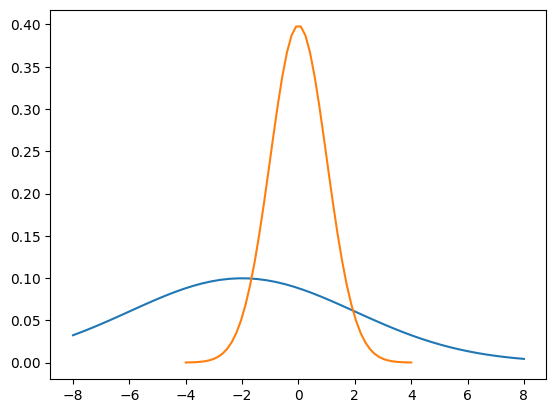

In [20]:
# Uppgift 7
from __future__ import annotations
import math
import numpy as np
import matplotlib.pyplot as plt

class NormalDist:
    def __init__(self, mu: float, sigma: float) -> None:
        self.mu = mu
        self.sigma = sigma

    def pdf(self, x: float) -> float:
        return 1/(self.sigma*math.sqrt(2*math.pi))*(math.e)**((-1/2)*(((x-self.mu)/self.sigma)**2))
    
    def plot_pdf(self, x_0, x_1) -> None:
        x = np.linspace(x_0, x_1)
        plt.plot(x, self.pdf(x))

    def __add__(self, other: NormalDist):
        return NormalDist(self.mu + other.mu, self.sigma + other.sigma)

    def __repr__(self):
        return f"{self.mu=}, {self.sigma=}"


normal1 = NormalDist(0, 1)
normal2 = NormalDist(-2, 3)
normal3 = normal1 + normal2
print(normal3)
normal1.pdf(0)
normal3.plot_pdf(-8, 8)
normal1.plot_pdf(-4, 4)





